## Final Project Submission


* Student name:  Noah-John Hizon
* Student pace: part time 
* Scheduled project review date/time: 7/29 2:30PM
* Instructor name: Abhineet Kulkarni
* Blog post URL: 

# Classifying a Song's Genre Using Lyrics

## Project Overview/Summary

The focus of this project is to provide a rudimentary tool for music recognition not through the song waveforms but through lyrics. This would be of value to companies like Spotify or Pandora, who can use this capability in order to improve the way people find music through their recommendation systems. Instead of searching by artist/era or album, a potential future recommendation system would be able to find a set of artists/songs who fit similar vibes/moods. 

Lyric data from Ariana Grande, Eminem, Drake, Post Malone, Taylor Swift, Maroon 5, and Selena Gomez's entire discography was used in order to develop a NLP model that will be able to identify which song belongs to which genre. The genres for identification for this project would be Rap and Pop. 

Stopwords were removed, and all tokens in the model were lemmatized in order to consolidate via root words. The TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer is used in conjunction with the Multinomial Naive Bayes classifier, in order to create a model that successfully classifies genre to a song. 

Differentiating genre solely on a song's lyrics has massive capabilities when it comes to the future of music recognition. The resulting model was able to successfully assign a given genre to a lyric with an accuracy of 92% on training data and 88% on testing data. As a side goal, this project will be able to identify common themes and verbiage that artists tend to use. 

## Business Problem 

An artist can be most understood through their lyrics and the messages they convey to their listeners. Generation defining artists like Kendrick Lamar and Frank Ocean captivate their audiences with poetic skill, painting vivid pictures within 16-bar verses. An artist's growth, both in musical talent and personal growth can also be observed their subsequent releases. As an example, the beginning of Drake's rap career started off with raw, unfiltered "backpack-rapper" influenced lyrics, heavily relying on his unique charisma as a defining feature. 

To build off this example, day-one fans of Drake have noticed his lyrical style evolve throughout his 16-year long music career. From emotional tributes, to party bangers, to multi-genre experiemental tracks, themes that express sadness, fame, infatuation, and desensitization can be identified through his word choice. In terms of other artists, when I listen to a Frank Ocean song, I can expect to be sad for hours. When I listen to a Disturbed song, I can expect to be angry, or hyped up. When I listen to a Marvin Gaye song I can expect to learn about the world of injustice he saw through his lyrics. 

With the plethora of music available nowadays, some might say the market is oversatured. From my personal experience, it can become increasingly harder to search for music that I actually want to listen when I'm in a given mood. Searching by an artist on Spotify is sometimes unpredictable/unfruitful, as artists like Drake have different phases of music theme and style throughout their extensive discography. While public users make playlists titled "Sad Jams" or "Gym Hype" on Spotify, more often than not, the music within these playlists doesn't typically align with when I'm actually looking to listen to. Even on some level, it would be interesting to see music search capabilities can be improved. Using something as rudimentary/simple as a search bar is antiquated at this point. 
 
Lyric data spanning Ariana Grande, Eminem, Drake, Taylor Swift, Maroon 5, Post Malone, and Selena Gomez's artist discography through 2021 will be aggregated/summarized in order to classify a given song lyric text body to its corresponding genre. An NLP (natural language processing) model will be created that will be able to accurately identify each song's respective genre, as well as identify themes/choice words artists tend to use in the process. The output of this project would be a precursor to a larger project for music recognition/recommendation through the use of an artist’s themes. 

## Data Understanding

Lyrics from the lyric aggregate site, Genius, were found pre-scraped from a Kaggle dataset. All packages for interpretation/modeling are imported in this step. Each row in the initial dataset represents an individual song, with its corresponding artist, song title, album title, year of release, and date of publishing. Upon observation, the song lyric text is represented in the Lyric column, as a long string separated by spaces and punctuation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, ConfusionMatrixDisplay,precision_score
from sklearn.ensemble import RandomForestClassifier

from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, FreqDist, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import string


lyricdata = pd.read_csv('lyrics.csv',header=0)
lyricdata.head(10)

,GENRE,GENRECODE,Artist,Artist Code,Title,Album,Year,Date,Lyric,Len
0,Rap,1,Eminem,1,Remind Me (Intro),Revival,2017,2017-12-15,yeah damn girl do i drive you crazy you make ...,203
1,Rap,1,Drake,2,MSG Freestyle (Hot 97),NaN,2016,2016-08-04,they tellin' lies on hot 97 that's how it goes...,206
2,Rap,1,Eminem,1,Run Your Jewels (Snippet),Unreleased Songs,2016,2016-09-14,verse little things start to trouble me pressu...,207
3,Rap,1,Drake,2,Intro,Comeback Season,2007,2007-10-24,spoken word you see the difference between me...,208
4,Rap,1,Drake,2,Drake’s Voice Mail Box #2,Room for Improvement,2006,2006-02-14,message what up this kim damn ive been trying...,214
5,Rap,1,Eminem,1,Alfred (Interlude),Music to Be Murdered By,2020,2020-01-17,spoken how do you do ladies and gentlemen my n...,216
6,Rap,1,Drake,2,Scorpion Intro,Unreleased Songs,NaN,NaN,yeah i'm in new york and you're in long islan...,221
7,Rap,1,Drake,2,Time Flies (Demo),Unreleased Songs,NaN,NaN,lyrics from snippet future girl you know ...,223
8,Rap,1,Eminem,1,8 Mile: Lily’s Lullaby,"8 Mile (Battles, Cyphers & Freestyles)",2002,2002-09-08,i know this girl her name is lily and it's pas...,235
9,Rap,1,Drake,2,Plenty*,NaN,NaN,NaN,lyrics from snippet when i get it plenty ple...,235


Across the 7 artists contained in the dataset, there are 2,137 total songs. The split of songs present each genre of interest are about even, 1,084 identified as Rap, and 1,053 identified as Pop.

While Rap and Pop are not always mutually exclusive in terms of style, I personally found these genres to be the most divergent within the ones that were present in the overall available dataset. 
Since the goal of this project is genre classification, it is important that the chosen genres don't have too much assumed overlap with lyrical content/subject matter.

Drake, Eminem, and Post Malone were identified as the Rap artists, and Taylor Swift, Ariana Grande, Maroon 5, and Selena Gomez were identified as the Pop artists.

There are 2137 total songs in the dataset
__________________
Rap    1084
Pop    1053
Name: GENRE, dtype: int64
__________________
Eminem           500
Drake            444
Taylor Swift     440
Ariana Grande    271
Maroon 5         196
Selena Gomez     146
Post Malone      140
Name: Artist, dtype: int64


<AxesSubplot:title={'center':'Artist Song Counts'}>

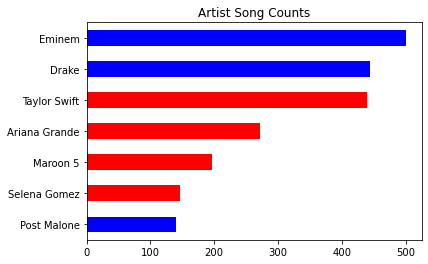

In [25]:
print(f"There are {len(lyricdata)} total songs in the dataset")
print("__________________")
print(lyricdata.GENRE.value_counts())
print("__________________")
print(lyricdata['Artist'].value_counts())

counts=lyricdata['Artist'].value_counts().sort_values(ascending=True)

counts.plot(kind='barh',color=['blue','red','red','red','red','blue','blue'],title='Artist Song Counts')

Below, artists within the dataset are individually identified, and their average words per song metric is calculated.
Naturally, it is expected that rap songs have a higher amount of words per song, due to their lyrical structure looking similar to poetry, and their style of delivery being similar to talking. Rappers like Eminem also have a fast "flow", and are known for their emphasis on clever lyricism and long verses. 

On the contrary, pop songs are often melodic; singers will hold notes for a sustained amount of time to show off their vocal prowess, inherently causing their overall words per song to be lower on average. 

In [497]:
eminemlyricset=lyricdata[lyricdata['Artist']=='Eminem']['Lyric']
drakelyricset=lyricdata[lyricdata['Artist']=='Drake']['Lyric']
arianalyricset=lyricdata[lyricdata['Artist']=='Ariana Grande']['Lyric']
selenalyricset=lyricdata[lyricdata['Artist']=='Selena Gomez']['Lyric']
taylorlyricset=lyricdata[lyricdata['Artist']=='Taylor Swift']['Lyric']
maroonlyricset=lyricdata[lyricdata['Artist']=='Maroon 5']['Lyric']
postlyricset=lyricdata[lyricdata['Artist']=='Post Malone']['Lyric']

fullset=[eminemlyricset,drakelyricset,arianalyricset,selenalyricset,taylorlyricset,maroonlyricset,postlyricset]

avgword=[]
for artr in artlist:
    avgword.append(int(np.mean(artr)))
    artlist=[]
    for art in fullset:
        artlen=[]
        df=pd.DataFrame(art,columns=['Lyric'])
        df.Lyric=[lyrix.split(' ') for lyrix in df.Lyric]
        for lyr in df.Lyric:
            artlen.append(len(lyr))
        artlist.append(artlen)

artists=['Eminem','Drake','Ariana Grande','Selena Gomez','Taylor Swift','Maroon 5','Post Malone']


artworddict={artists[i]: avgword[i] for i in range(len(artists))}


for k,v in artworddict.items():
        print(f"On average, {k} has {v} words per song")

On average, Eminem has 707 words per song
On average, Drake has 499 words per song
On average, Ariana Grande has 374 words per song
On average, Selena Gomez has 335 words per song
On average, Taylor Swift has 357 words per song
On average, Maroon 5 has 350 words per song
On average, Post Malone has 423 words per song


Now that general metrics regarding the dataset are identified for context, the dataset can now be prepped for modeling.

## Data Preparation

The first step in prepping the dataset to be summarized is to break each lyric (currently stored as a text string in the overall table) into individual tokens, separating by commas, then re-populating as a list in each row in the dataframe.
Below, the regular expression pattern is used within the tokenizer to split words, looking for non-letter characters as boundaries while preserving apostrophes within words where relevant.
Success is observed due to row 6 still containing "i'm" as an individual word, rather than splitting at the apostrophe. 

In [26]:
pattern=r"([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer=RegexpTokenizer(pattern)
lyricdata.Lyric=lyricdata['Lyric'].apply(tokenizer.tokenize)

lyricdata.Lyric.head(20)

0     [yeah, damn, girl, do, i, drive, you, crazy, y...
1     [they, tellin, lies, on, hot, that's, how, it,...
2     [verse, little, things, start, to, trouble, me...
3     [spoken, word, you, see, the, difference, betw...
4     [message, what, up, this, kim, damn, ive, been...
5     [spoken, how, do, you, do, ladies, and, gentle...
6     [yeah, i'm, in, new, york, and, you're, in, lo...
7     [lyrics, from, snippet, future, girl, you, kno...
8     [i, know, this, girl, her, name, is, lily, and...
9     [lyrics, from, snippet, when, i, get, it, plen...
10    [a, body, map, of, s, tattoos, starting, from,...
11    [verse, alice, and, the, glass, lake, i've, dr...
12    [lyrics, will, be, available, whenif, the, son...
13    [you're, from, timmins, and, i'm, from, toront...
14    [skit, get, up, dad, what, what'd, i, fuckin, ...
15    [tell, us, that, you, would, like, to, have, t...
16    [interlude, this, concludes, our, danse, macab...
17    [shook, ones, pt, ii, time's, up, insane, 

In [499]:
print(len(set(lyricdata.Lyric[0])))
print(len(set(lyricdata.Lyric[500])))
print(len(set(lyricdata.Lyric[1000])))
print(len(set(lyricdata.Lyric[1500])))
print(len(set(lyricdata.Lyric[2000])))

27
268
74
111
76


Prior to importing the dataset, it was observed that most words within the lyric text were already in lowercase, but to account for potential outliers, all words are converted in the following step. 
It would not be desirable to count 2 words as distinct if their only differing factor is case (e.g. "I'm" vs "i'm".)

In the following step, English stopwords were imported and a function was created to remove all stopwords within each list of lyrics. When doing a form of classification, it is important to remove stopwords as there are bound to be sets of words that are common amongst any body of text (e.g. "and","the). Keeping these words makes it harder for the eventual model to differentiate between two sets of text and make the proper classification.

In [500]:
lyricdata.Lyric=[[word.lower() for word in lyr] for lyr in lyricdata.Lyric]

In [501]:
sw=stopwords.words('english')

def removestopwords(list):
    removed=[word for word in list if word not in sw]
    return removed
lyricdata.Lyric=lyricdata.Lyric.apply(removestopwords)

lyricdata.Lyric.head(10)


0    [yeah, damn, girl, drive, crazy, make, crazy, ...
1    [tellin, lies, hot, that's, goes, told, em, fi...
2    [verse, little, things, start, trouble, pressu...
3    [spoken, word, see, difference, hit, rock, bot...
4    [message, kim, damn, ive, trying, get, week, d...
5    [spoken, ladies, gentlemen, name, alfred, hitc...
6    [yeah, i'm, new, york, long, island, even, tre...
7    [lyrics, snippet, future, girl, know, still, d...
8    [know, girl, name, lily, past, bed, time, goes...
9    [lyrics, snippet, get, plenty, plenty, plenty,...
Name: Lyric, dtype: object

In order to get a better sense of the data, now that the words have been tokenized and stop words have been removed, the following code is used to visualize the distribution of words within each available artist's lyrics. 
From the respective charts, it can be observed that there are still some commonalities amongst top words for each artist, even after stopwords have been removed. If these pose an issue, they can be removed in later iterations of modeling in order to improve performance, but for now, “i’m” and “like” are removed. 

It is blatantly evident that within the rap artists (Drake, Eminem, and Post Malone), curse words are far more prevalent in their lyrics, while none are present in the pop songs. Within the pop songs, “love” seems to be a common word, taking a top 10 slot across all artists.

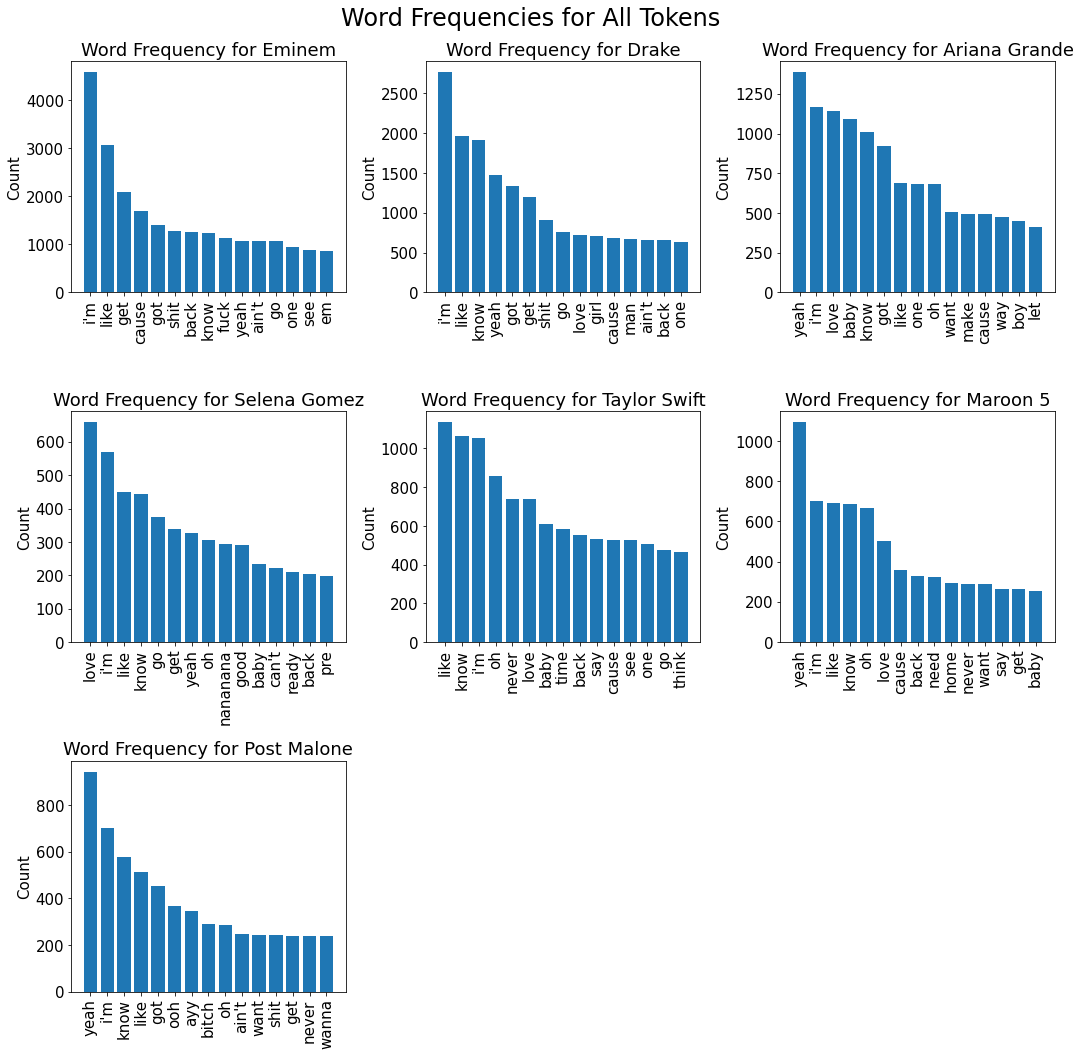

In [502]:

def setup_seven_subplots():
    fig = plt.figure(figsize=(15,15))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(3, 6)
    ax1 = fig.add_subplot(gs[0, :2]) 
    ax2 = fig.add_subplot(gs[0, 2:4])
    ax3 = fig.add_subplot(gs[0, 4:6]) 
    ax4 = fig.add_subplot(gs[1, :2])
    ax5 = fig.add_subplot(gs[1, 2:4])
    ax6 = fig.add_subplot(gs[1, 4:6]) 
    ax7 = fig.add_subplot(gs[2, :2])
    return fig, [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

fig, axes = setup_seven_subplots()

artnumberdict={'Eminem':0,'Drake':1,'Ariana Grande':2,'Selena Gomez':3,'Taylor Swift':4,'Maroon 5':5,'Post Malone':6}

def plot_distribution_of_column_by_category(df, axes, title="Word Frequency for"):
    artistmostcommon={}
    for key, value in artnumberdict.items():
        all_words=df[df["Artist"] == key]['Lyric'].explode()
        freq_dist = FreqDist(all_words)
        top_15 = list(zip(*freq_dist.most_common(15)))
        tokens = top_15[0]
        counts = top_15[1]
        ax=axes[value]
        ax.bar(tokens, counts)
        ax.set_title(f"{title} {key}")
        ax.set_ylabel("Count")
        ax.tick_params(axis="x", rotation=90)
        plt.rcParams.update({'font.size':15})

plot_distribution_of_column_by_category(lyricdata, axes)
fig.suptitle("Word Frequencies for All Tokens", fontsize=24);


In [503]:
sw+=list(["i'm",'like'])
lyricdata.Lyric=lyricdata.Lyric.apply(removestopwords)

lyricdata.Lyric.head(5)

0    [yeah, damn, girl, drive, crazy, make, crazy, ...
1    [tellin, lies, hot, that's, goes, told, em, fi...
2    [verse, little, things, start, trouble, pressu...
3    [spoken, word, see, difference, hit, rock, bot...
4    [message, kim, damn, ive, trying, get, week, d...
Name: Lyric, dtype: object

Doing a quick check amongst the distinct words that are present within the dataset, it seems as if removing stopwords caused the overall word count to drop to a great degree.

In [504]:
print(len(set(lyricdata.Lyric[0])))
print(len(set(lyricdata.Lyric[500])))
print(len(set(lyricdata.Lyric[1000])))
print(len(set(lyricdata.Lyric[1500])))
print(len(set(lyricdata.Lyric[2000])))

16
200
45
66
47


Now that the words are tokenized and prepped for modeling, a final count is done of the set of words present in each genre.  Surprisingly, the count is about even between the two genres. It was expected that Rap would have a significantly higher amount of distinct words, considering their average word count was higher overall as well.

In [505]:
rapvocab=set()
popvocab=set()

rapset=lyricdata[lyricdata['GENRECODE']==1]
popset=lyricdata[lyricdata['GENRECODE']==2]

for lyr in rapset['Lyric']:
    rapvocab.add(tuple(lyr))
    
for lyr in popset['Lyric']:
    popvocab.add(tuple(lyr))

print("The Rap discography has {} distinct words".format(len(rapvocab)))
print("The Pop discography has {} distinct words".format(len(popvocab)))

The Rap discography has 1080 distinct words
The Pop discography has 1026 distinct words


## Data Modeling

In order to initialize modeling, the data is split into train and testing groups so that the models can be evaluated in the presence of new data.

In [506]:
X=lyricdata['Lyric']
y=lyricdata['GENRECODE']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

### Model 1: Count Vectorizer + Multinomial Naive Bayes

In order to further prep the data, a count vectorizer is initialized. Vectorizers are necessary for this process, as it provides a way to convert text data, currently in the form of lists, into a form that a model can understand. The Count Vectorizer is a rudimentary vectorizer, which solely counts the presence of a word in any given document. The min_df is specified as 30, an arbitrary number for our baseline model. The min_df value of 30 implies that all words in the vectorizer need to be in the document base at least 30 times. Similarly, the max_df is specified as 1000, which implies that words are only considered as identifiers for the model if they appear in less than 1000 distinct documents. Words that appear too frequently across the base are not desirable, as their inclusion may decrease resulting performance.

In [507]:
cvec= CountVectorizer(min_df=30,max_df=1000)

X_traindf=pd.DataFrame(X_train,columns=['Lyric'])
X_testdf=pd.DataFrame(X_test,columns=['Lyric'])

X_trainvec = cvec.fit_transform(X_traindf['Lyric'].apply(lambda x: ' '.join(x)))
X_testvec = cvec.transform(X_testdf['Lyric'].apply(lambda x: ' '.join(x)))
X_trainvec = pd.DataFrame.sparse.from_spmatrix(X_trainvec)
X_trainvec.columns = sorted(cvec.vocabulary_)
X_trainvec.set_index(y_train.index, inplace=True)

X_trainvec.head()

,able,across,act,actin,acting,actually,admit,afraid,age,ago,...,ya,yeah,year,years,yes,yet,yo,york,young,youre
686,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,1,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
816,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
674,0,0,0,0,0,0,0,0,0,0,...,1,17,0,0,1,0,1,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Below, a Multinomial Naive Bayes model is instantiated for our model to be fit on, and the plotted confusion matrix helps visualize how well the model did. The MultinomialNB model is essential for text classification, as it involves using conditional probability across the different categorizations, and is generally good for classifying on distinct features.

The corresponding confusion matrix, seen below, shows how the model classifies the test/train data using the Multinomial Naive Bayes classifier through counts of true/false positives/negatives.

LEGEND:
Rap in True label, Rap in Predicted label - True Negative

Rap in True label, Pop in Predicted label - False Positive

Pop in True label, Pop in Predicted label - True Positive

Pop in True label, Rap in Predicted label - False Negative

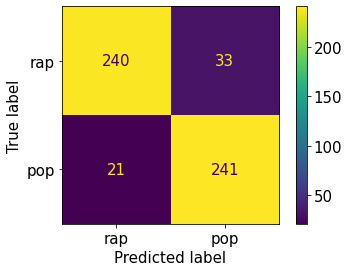

In [508]:
baseline_model = MultinomialNB()

baseline_model.fit(X_trainvec,y_train)
y_hattest=baseline_model.predict(X_testvec)
y_hattrain=baseline_model.predict(X_trainvec)
plot_confusion_matrix(baseline_model, X_testvec, y_test,display_labels=['rap','pop'])

Below, results of the first model can be seen through the classification report. The classification report outputs 3 metrics of critical importance: precision, recall, accuracy, and f1 score.
These main metrics help understand how well the model performed in terms of classifying each song genre as a rap/pop.

#### Precision:
Precision measures how precise the predictions are. Precision is calculated by taking the number of true Rap classifications, and dividing by the number of Rap song classifications predicted by the model.

#### Recall:
Recall measures what % of the games identified as Rap were actually identified correctly. Recall is calculated by dividing the number of total true Rap classifications identified by the model, by the number of actual Rap songs.

#### Accuracy:
Accuracy evaluates all predictions within the model. Accuracy is calculated by dividing the total correct predictions from the model (both Rap/Pop) by the total records in the original dataset.

#### F1 Score:
F1 Score takes both precision and recall into account to get a cumulative score. The formula is calculated as follows: 2(precision recall)/(precision + recall). This metric is a good measure of overall model performance, as a high F1 score implies both precision and recall are both high as well.

As seen below, the initial model performs relatively well on the test data, seen from the predicted values using the trained model. F1 score is relatively high for both Rap/Pop classifications, implying succesful precision and recall values as well. Looking at the overall accuracy, across all observations, our model performed exceptionally well too.

In [509]:
reporttest1=classification_report(y_test, y_hattest)
reporttrain1=classification_report(y_train, y_hattrain)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest1)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain1)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.92      0.88      0.90       273
           2       0.88      0.92      0.90       262

    accuracy                           0.90       535
   macro avg       0.90      0.90      0.90       535
weighted avg       0.90      0.90      0.90       535

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       811
           2       0.89      0.95      0.92       791

    accuracy                           0.92      1602
   macro avg       0.92      0.92      0.92      1602
weighted avg       0.92      0.92      0.92      1602



### Model 2: TF_IDF Vectorizer + Multinomial Naive Bayes

For the second iteration of the model, since the Multinomial Naive Bayes classifier seems to be an ideal fit for this type of text data, the vectorizer will now be changed in order to see if model performance will improve. This time, a TF-IDF vectorizer, also known as Term Frequency-Inverse Document Frequency, will be used. This type of vectorizer is ideal for use in the case of multiple text documents, and due to the nature of the calculation, it implies rare words contain more information than common words. Term Frequency (TF) represents the presence of a word in a document as a fraction, while inverse document frequency (IDF) represents the prevalence of a word across all documents. By multiplying the two, a value for the importance each word has in the entire document base is obtained.

Similarly to the Count vectorizer, the min_df and max_df parameters will be kept the same in order to compare similar setups.

In [510]:
tfidf=TfidfVectorizer(min_df=30,max_df=1000)

X_trainvec2=tfidf.fit_transform(X_traindf["Lyric"].apply(lambda x: ' '.join(x)))
X_testvec2=tfidf.transform(X_testdf["Lyric"].apply(lambda x: ' '.join(x)))

pd.DataFrame.sparse.from_spmatrix(X_trainvec2, columns=tfidf.get_feature_names())

,able,across,act,actin,acting,actually,admit,afraid,age,ago,...,ya,yeah,year,years,yes,yet,yo,york,young,youre
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.028060,0.032156,0.0,0.000000,0.035833,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.083696,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.026471,0.015168,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.030224,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.028275,0.275425,0.0,0.000000,0.036108,0.0,0.031493,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.077305,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.050534,0.000000,0.0,0.000000,0.0,0.000000,0.0
1598,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.087886,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1599,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1600,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.117610,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


As seen through the slightly improved recall scores within both the test data and training data, we can see evident model improvement with the use of the TF-IDF vectorizer. 

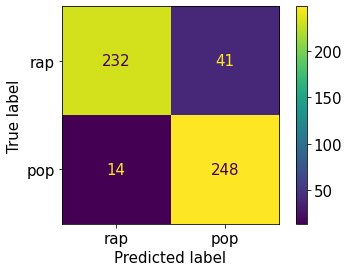

In [511]:
baseline_model=MultinomialNB()
baseline_model.fit(X_trainvec2,y_train)
y_hattest2=baseline_model.predict(X_testvec2)
y_hattrain2=baseline_model.predict(X_trainvec2)

plot_confusion_matrix(baseline_model, X_testvec2,y_test,display_labels=['rap','pop'])

In [512]:
reporttest2=classification_report(y_test, y_hattest2)
reporttrain2=classification_report(y_train, y_hattrain2)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest2)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain2)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.94      0.85      0.89       273
           2       0.86      0.95      0.90       262

    accuracy                           0.90       535
   macro avg       0.90      0.90      0.90       535
weighted avg       0.90      0.90      0.90       535

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.96      0.87      0.92       811
           2       0.88      0.97      0.92       791

    accuracy                           0.92      1602
   macro avg       0.92      0.92      0.92      1602
weighted avg       0.92      0.92      0.92      1602



### Model 3: TF-IDF Vectorizer + Random Forest Classifier

Keeping the TF-IDF vectorizer, as it has been identified to have a clear improvement over the Count vectorizer, another classifier is tried for the sake of curiosity, the Random Forest Classifier. This model works by using several decision trees in order to make a classifying decision. In prior projects, the Random Forest was seen to have relatively good performance on determining game outcomes for the NBA.

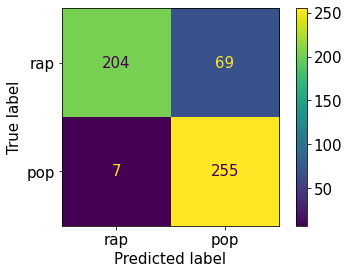

In [513]:
model2 = RandomForestClassifier(n_estimators=20, max_features=5, max_depth=5)
model2.fit(X_trainvec2, y_train)
y_hattest3 = model2.predict(X_testvec2)
y_hattrain3 = model2.predict(X_trainvec2)

plot_confusion_matrix(model2, X_testvec,y_test, display_labels=['rap','pop'])

As seen in the following classification report, recall of Rap songs went down to a great degree, showing that the application of this new model tended to favor the Pop song classifications, across both the test and training data. The Random Forest Classifier will not be considered for the final model iteration, and the MultinomialNB model will be continuously improved upon.

In [514]:
reporttest3=classification_report(y_test, y_hattest3)
reporttrain3=classification_report(y_train, y_hattrain3)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest3)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain3)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.99      0.75      0.85       273
           2       0.79      0.99      0.88       262

    accuracy                           0.87       535
   macro avg       0.89      0.87      0.86       535
weighted avg       0.89      0.87      0.86       535

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.98      0.75      0.85       811
           2       0.79      0.98      0.88       791

    accuracy                           0.86      1602
   macro avg       0.88      0.86      0.86      1602
weighted avg       0.88      0.86      0.86      1602



### Model 4: Lemmatizing and Removing Additional Stopwords - TF-IDF and Multinomial Bayes

As seen in prior word count distributions across the artists, it was observed that some words like “get” and “got” were considered as distinct words although semantically, they have the same meaning. In an effort to improve prior model performance, words will be lemmatized in order to consolidate based on their root words.  Below, the part of speech is tagged to each token word, and the root words of each are found. Additionally, more common words amongst the genres are included in order to decrease similarity amongst the genre sets. Word frequencies are revisualized, each genre/artist looking more unique.

In [515]:
 def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def doc_lemmatizer(doc):
    doc=pos_tag(doc)
    doc=[(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer=WordNetLemmatizer()
    doc=[lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return doc
    

lyricdata.Lyric=[doc_lemmatizer(lyric) for lyric in lyricdata.Lyric]

In [516]:
sw+=list(["know","yeah"])

lyricdata.Lyric=lyricdata.Lyric.apply(removestopwords)

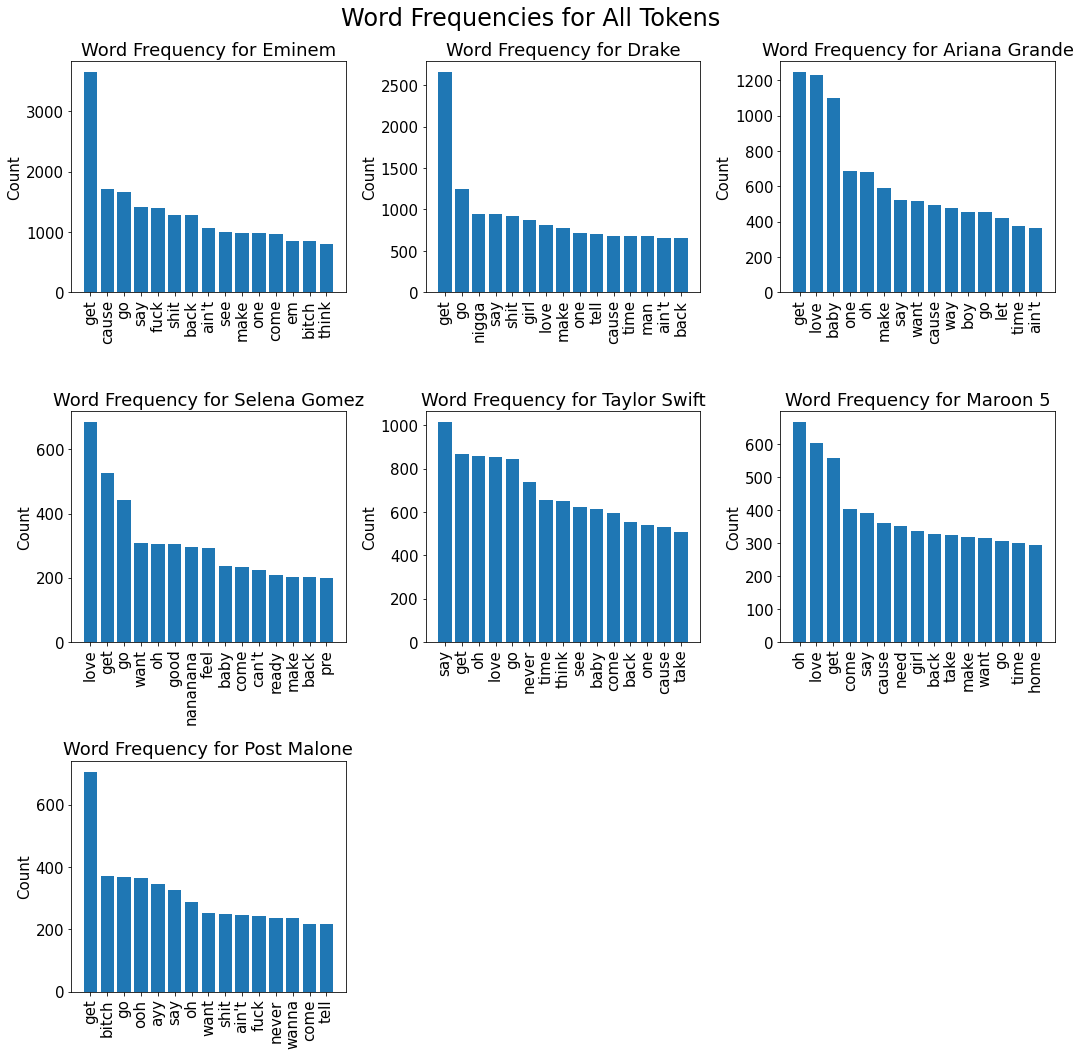

In [517]:
fig, axes3 = setup_seven_subplots()

plot_distribution_of_column_by_category(lyricdata, axes3)
fig.suptitle("Word Frequencies for All Tokens", fontsize=24);

In [518]:
X4=lyricdata['Lyric']
y4=lyricdata['GENRECODE']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4, test_size=.25, random_state=42)

X_traindf4=pd.DataFrame(X_train4,columns=['Lyric'])
X_testdf4=pd.DataFrame(X_test4,columns=['Lyric'])

tfidf=TfidfVectorizer(min_df=30,max_df=1000)

X_trainvec4=tfidf.fit_transform(X_traindf4["Lyric"].apply(lambda x: ' '.join(x)))
X_testvec4=tfidf.transform(X_testdf4["Lyric"].apply(lambda x: ' '.join(x)))
pd.DataFrame.sparse.from_spmatrix(X_trainvec4, columns=tfidf.get_feature_names())

,able,accept,across,act,actin,action,actually,add,addict,admit,...,ya,year,yell,yes,yet,yo,york,young,youre,zone
0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.031608,0.000000,0.0,0.040364,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.026035,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.029407,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.030494,0.000000,0.0,0.038941,0.0,0.033964,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.21522,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.045135,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1598,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1599,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1600,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


Model performance decreased slightly in terms of recall, possibly due to the recategorizing of words due to lemmatization. Overall word count dropped ~100 from consolidation. Similar to the Random Forest model, slight skewing towards Pop classification is observed. Consolidating "get" and "got" may have decreased performance, as those words are individually clear identifiers of Rap songs, rather than Pop songs.
There is a slight preference for this model, even though it decreased performance, as now all root words are properly classified/identified. 

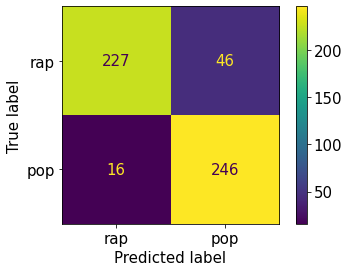

In [519]:
baseline_model.fit(X_trainvec4, y_train4)
y_hattest4 = baseline_model.predict(X_testvec4)
y_hattrain4 = baseline_model.predict(X_trainvec4)

plot_confusion_matrix(baseline_model, X_testvec4,y_test4,display_labels=['rap','pop'])

In [520]:
reporttest4=classification_report(y_test4, y_hattest4)
reporttrain4=classification_report(y_train4, y_hattrain4)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest4)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain4)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.93      0.83      0.88       273
           2       0.84      0.94      0.89       262

    accuracy                           0.88       535
   macro avg       0.89      0.89      0.88       535
weighted avg       0.89      0.88      0.88       535

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.97      0.86      0.91       811
           2       0.87      0.97      0.92       791

    accuracy                           0.92      1602
   macro avg       0.92      0.92      0.92      1602
weighted avg       0.92      0.92      0.92      1602



### Model 5: Gridsearch on Random Forest Classifier - TF-IDF

In an effort to improve model performance for the Random Forest classifier, a grid search is used in order to identify potential parameters, to see if application would outperform the Naive Bayes model. Results as depicted below show that while falsely identified Pop songs were mitigated a bit, and overall recall performance improved from the initial Random Forest model, the Naive Bayes model still outperforms the Random Forest model. 

In [525]:
depth = [i for i in range(6,10,1)]
features=[i for i in range(3,7,1)]
estimators=[i for i in range(20,80,10)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, max_features=features, n_estimators=estimators)
forest2=RandomForestClassifier(random_state=11)

search=GridSearchCV(forest2,parameters,cv=3,return_train_score=True)
search.fit(X_trainvec4,y_train4)

search.best_params_

{'max_depth': 9, 'max_features': 4, 'n_estimators': 60}

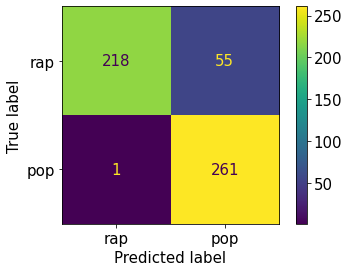

In [526]:
forest3=RandomForestClassifier(max_depth=9,max_features=4,n_estimators=60)

forest3.fit(X_trainvec4, y_train4)
y_hattest5 = forest3.predict(X_testvec4)
y_hattrain5 = forest3.predict(X_trainvec4)

plot_confusion_matrix(forest3, X_testvec4,y_test4,display_labels=['rap','pop'])

In [527]:
reporttest5=classification_report(y_test4, y_hattest5)
reporttrain5=classification_report(y_train4, y_hattrain5)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest5)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain5)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       1.00      0.80      0.89       273
           2       0.83      1.00      0.90       262

    accuracy                           0.90       535
   macro avg       0.91      0.90      0.89       535
weighted avg       0.91      0.90      0.89       535

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       1.00      0.79      0.88       811
           2       0.82      1.00      0.90       791

    accuracy                           0.89      1602
   macro avg       0.91      0.89      0.89      1602
weighted avg       0.91      0.89      0.89      1602



#  Classifier Results Evaluation

When considering a matter as sensitive as music genre, the distribution of words chosen across artist's song lyrics have a large impact on how their music is perceived and recognized by cultures and communities. The final model created, using a Multinomial Naive Bayes classifier with a TF-IDF vectorizer, was able to predict song genre given song lyrics with an accuracy of 88% for test data and 92% for training data. 

A classification report and confusion matrix of the classifier model can be seen below across the test/train datasets.

In [530]:
print('Test Data Classification Report')
print('_________________________________')
print(reporttest4)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain4)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.93      0.83      0.88       273
           2       0.84      0.94      0.89       262

    accuracy                           0.88       535
   macro avg       0.89      0.89      0.88       535
weighted avg       0.89      0.88      0.88       535

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

           1       0.97      0.86      0.91       811
           2       0.87      0.97      0.92       791

    accuracy                           0.92      1602
   macro avg       0.92      0.92      0.92      1602
weighted avg       0.92      0.92      0.92      1602



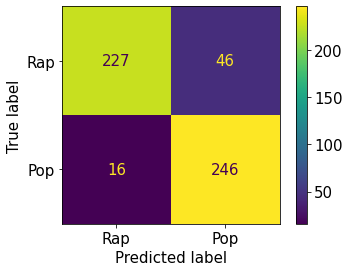

In [532]:
plot_confusion_matrix(baseline_model, X_testvec4,y_test4,display_labels=['Rap','Pop'])

For the test data, recall was far higher than precision for Pop predictions, which implies the model was better at correctly selecting true Pop songs, rather than predicting whether a song was truly Pop/Rap. On the contrary, recall for Rap songs was far lower. This means the model tends to favor assigning false positive Pop songs. The tendency to designate false positive Pop songs can be overlooked since the recall % of overall genre predictions were high, which is the main target metric of success within the model. 

For the training data, similar trends can be seen within precision, recall, and f1-score for Rap/Pop predictions, but the model was slightly better with the data it was trained on. Both test/training predictions having ~90% accuracy implies that there is negligible overfitting on the final model. 

Below, the consolidated/lemmatized data for word distributions across the artists in the dataset can be observed. Model performance being largely successful can be rationalized by simply looking at the evident difference in word composition between artists. 

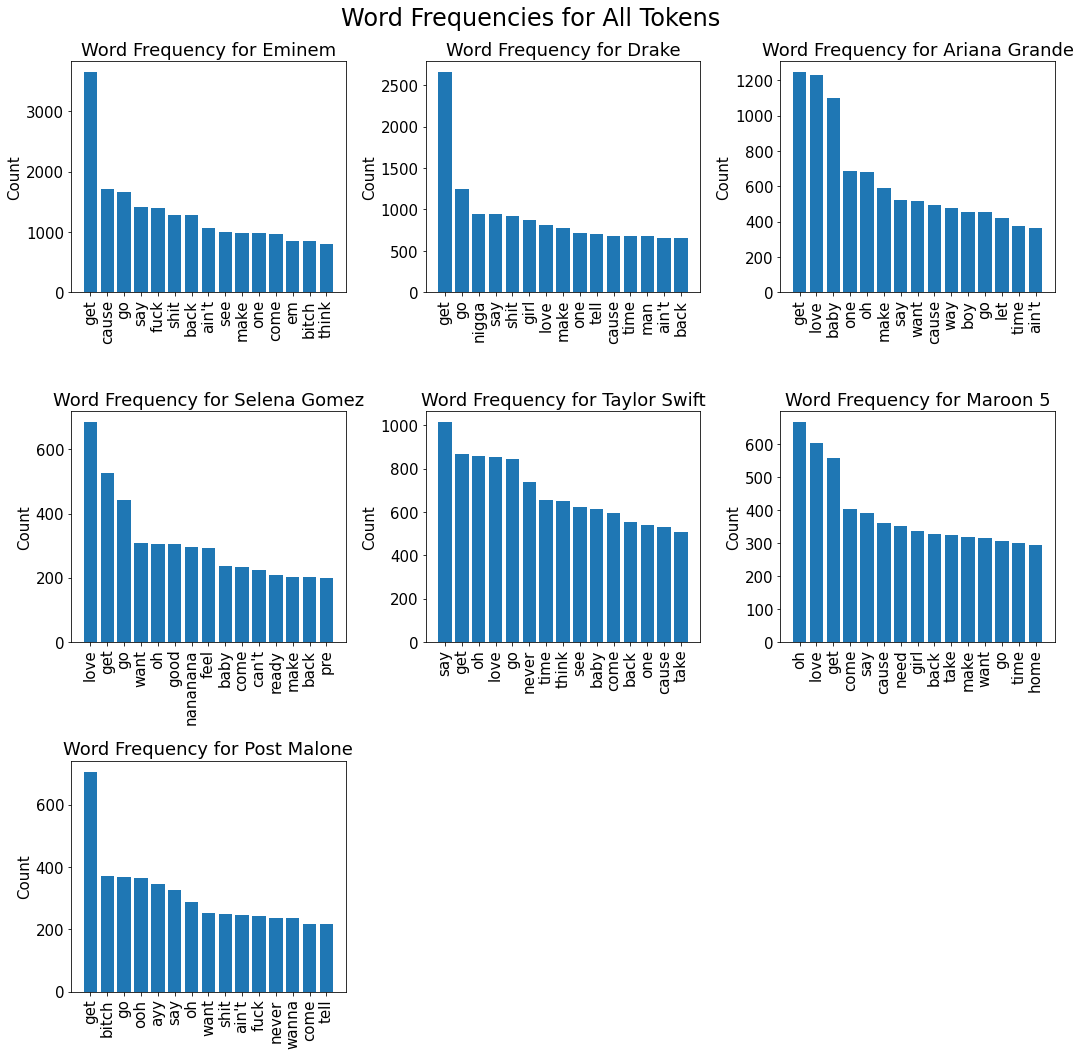

In [533]:
fig, axes3 = setup_seven_subplots()

plot_distribution_of_column_by_category(lyricdata, axes3)
fig.suptitle("Word Frequencies for All Tokens", fontsize=24);

## Observed Profanity

A common thread linking most rap music since its inception in the late 80s/early 90s is the prevalence of profanity. For the rap artists included in the data set this is evident, especially with Eminem, who is notorious for being a "NSFW" artist. A large part of this tendency may be holdover influence from the "gangster rap" movement in the 90s, music containing themes of violence/perceived vulgar subject matter. Between the rap and pop genres, it is undeniable that the prevalence had a large effect on the classifier's success. Pop music is generally perceived as family-friendly, radio-friendly music that is palatable for all ages through all mediums, hence its popularity. While profane words took several of the top 15 slots  across the rap artists, no profanity was seen in any of the pop artist lyrics. 

## Perceived Gender

In hindsight, gender did have an inherent influence on the success of the results. The rap genre was solely comprised of male artists, and aside from Maroon 5, the pop genre was solely comprised of female artists. While music should ideally be universal, where anyone regardless of gender can relate on some level with a song, the word frequency shows an evident disconnect from this idea. This is to be expected, as artist write music about their own personal experiences, one of the most prevalent topics being about heartbreak/love. In the male rap artists (who are known as heterosexual), some songs can be seen directed to/referencing women; the use of female-oriented words like b**** (while problematic) and girl are seen in all rappers' top slots. Similarly in pop songs, words like baby and boy and love are far more prevalent. This inherent  bias seen through gender likely had a great effect on the successful model classification.

## Recommendations/Conclusion


The model was able to successfully assign the majority of songs within the testing dataset to their respective listed genres, solely through the use of song lyrics. While an 90% accuracy across both test/training data may be seen as a poorly performing model when considering perceived blatant differences between artists, there is a bit of overlap in subject matter between mainstream Pop and Rap songs especially when considering the artists in the dataset. 

Some may say the line is blurred for rappers like Post Malone and Drake, who are frequently observed experimenting with new instruments/lyrical styles in their music in an effort to appeal to wider audiences. Similarly, Pop artists frequently have features by Rap artists in their recent songs, examples of cross-genre collaboration seen with Katy Perry & Snoop Dogg, Adam Levine and Kanye West, BTS and Nicki Minaj. More definitive/improved model performance may be seen when using data sourced exclusively from 90's music, when the genres were observed as largely being mutually exclusive.


The findings of this model show that there is inherent correlation with lyrical subject matter/composition and perceived genre. Regarding the stakeholders, Spotify and Pandora, genre recognition through lyrics has massive implications on how music recommendation can be reworked/improved. The ability to identify commonalities through songs that have similar lyrical themes can expose users to music that truly fits their mood, improving customer experience and retention. While this project was a very rudimentary look into a new lens of song classification, the results and framework of this model could be extended to a new form of general music classification/song recommendation. Since the experience of listening to music is so fundamentally nuanced from person to person, being able to succesfully recommend exactly what someone is looking for has limitless applications for the future of music streaming.
 

### Next Steps

Inherently, subject matter, cultural shifts, and pop culture have changed drastically within the last 30 years, largely due to the advent of the internet. It would be interesting to see this model performed on music lyrics from the 90s, when the rap and pop genres were widely seen as distinctly different. From a broader perspective, the artists selected within this dataset can all be classified as mainstream pop music to some. Outside of the lens of rap and pop, different genres could be also compared, such as country and soul, to see if there may be inherent overlap/differing characteristics.

Another route of improvement would be to classify using bigrams as a supplement. This factor was not addressed during the final iterations of the model as the words involved, regardless of context, were distinct enough to make successful classifications, seen by the final performance. Tying this back to the prior point regarding gender, it would be interesting to see the context in which women are talked about in either genre, and if implementing those specific bigrams would improve performance further. 

Another route of improvement would be to think about genre from a wider perspective. Similar to the point brought up in the conclusion, This would involve information-gathering to understand public sentiment towards a set of songs. Being able to classify songs based on the induced feeling within a listener would improve current recommendations systems to a great degree. Additional columns describing mood could be created in the dataset and implemented in a new model. 